In [46]:
from env import host, username, password
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from datetime import date
import nick_wrangle as get
import plotly.express as px

In [60]:
train, test = get.wrangle_superstore()
df = get.acquire_superstore_data()
df = get.prepare_superstore(df)

Using cached CSV
Using cached CSV
Using cached CSV
Using cached CSV


In [4]:
train.shape

(1238, 23)

In [5]:
test.shape

(496, 23)

In [6]:
train.index.is_unique
test.index.is_unique
# CLASS IS IN SESSION


True

In [9]:
# Let's see how each has changed over time 
office_supplies = train.loc[train['category'] == 'Office Supplies']
furniture = train.loc[train['category'] == 'Furniture']
technology = train.loc[train['category'] == 'Technology']

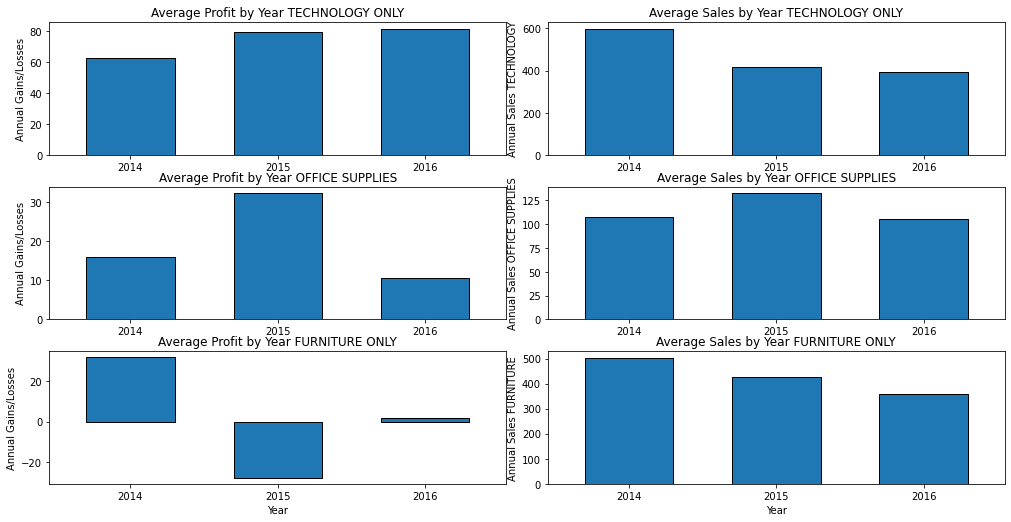

In [23]:
# Very consistent monthly profits for technology, in that we appear to never lose money. 
# Checking overall profit and sales in technology side by side
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 1)
y = technology.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 2)
y2 = technology.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Sales TECHNOLOGY')

# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 3)
y = office_supplies.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 4)
y2 = office_supplies.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Sales OFFICE SUPPLIES')

# Checking overall profit and sales in furniture side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 5)
y = furniture.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 6)
y2 = furniture.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')

plt.show()

In [ ]:
# Sorted profit_per_product in train in descending order
top_profit = train.sort_values(by='profit_per_product', ascending=False, na_position='last')
top_50_profitable_items = top_profit.head(50)
top_50_df = pd.DataFrame(top_50_profitable_items)
top_50_df

In [25]:
import mitosheet
mitosheet.sheet(top_50_df, analysis_to_replay="id-zkvqqtamuw")

MitoWidget(analysis_data_json='{"analysisName": "id-zkvqqtamuw", "analysisToReplay": null, "code": [], "stepSu…

In [15]:
# Sorted profit_per_product in train in ascending order
least_profit = train.sort_values(by='profit_per_product', ascending=True, na_position='last')
least_50_profitable_items = least_profit.head(50)
least_50_df = pd.DataFrame(least_50_profitable_items)
least_50_df

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-01-04 00:00:00,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928
2014-01-04 01:00:00,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912
2014-01-04 02:00:00,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770
2014-01-09 00:00:00,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672
2014-01-09 01:00:00,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400


In [40]:

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(office_supplies, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Office Supplies Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [41]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(technology, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Technology Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [45]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(furniture, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Furniture Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [50]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(office_supplies, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Office Supplies Products', 
    xaxis = dict(
        title='Product Type', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [53]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(technology, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Technology Products', 
    xaxis = dict(
        title='Product', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [56]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(furniture, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Furniture Products', 
    xaxis = dict(
        title='Products', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [ ]:
### Which products are most profitable?          
### Which products had outstanding sales volumes?          
### Does product type vary by customer/region?    

In [35]:
train2 = train.copy()
train2= train2.reset_index(drop=False)

In [37]:
train2
train2['fiscal_quarter'] = train2['order_date_anew'].dt.quarter

In [39]:
train2.set_index('order_date_anew')

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,fiscal_quarter
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-01-04 00:00:00,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928,1
2014-01-04 01:00:00,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912,1
2014-01-04 02:00:00,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770,1
2014-01-09 00:00:00,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672,1
2014-01-09 01:00:00,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24 01:00:00,OFF-ST-10003716,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,540.048,...,Tennsco Double-Tier Lockers,Office Supplies,Storage,South,4 days,December,2016,-15.7514,180.016,4
2016-12-24 02:00:00,TEC-AC-10004469,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,255.680,...,Microsoft Sculpt Comfort Mouse,Technology,Accessories,South,4 days,December,2016,9.5880,31.960,4
2016-12-26 00:00:00,OFF-PA-10003673,FP-14320,US-2016-153129,2016-12-30,Standard Class,Consumer,Seattle,Washington,98105.0,33.900,...,Strathmore Photo Mount Cards,Office Supplies,Paper,West,4 days,December,2016,3.1188,6.780,4


In [62]:
# Let's see how each has changed over time 
office_supplies_df = df.loc[df['category'] == 'Office Supplies']
furniture_df = df.loc[df['category'] == 'Furniture']
technology_df = df.loc[df['category'] == 'Technology']

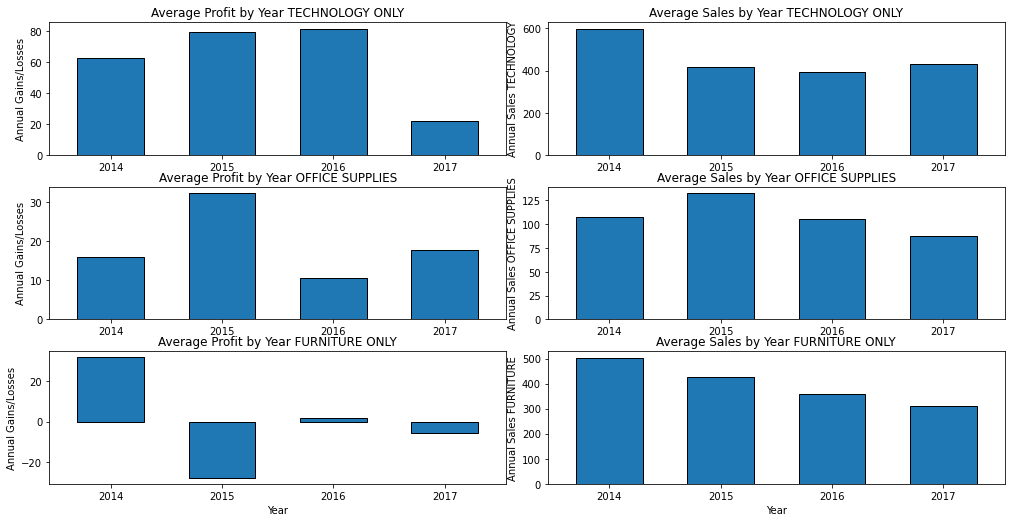

In [63]:
# Very consistent monthly profits for technology, in that we appear to never lose money. 
# Checking overall profit and sales in technology side by side
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 1)
y = technology_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 2)
y2 = technology_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Sales TECHNOLOGY')

# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 3)
y = office_supplies_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 4)
y2 = office_supplies_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Sales OFFICE SUPPLIES')

# Checking overall profit and sales in furniture side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 5)
y = furniture_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 6)
y2 = furniture_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')

plt.show()

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

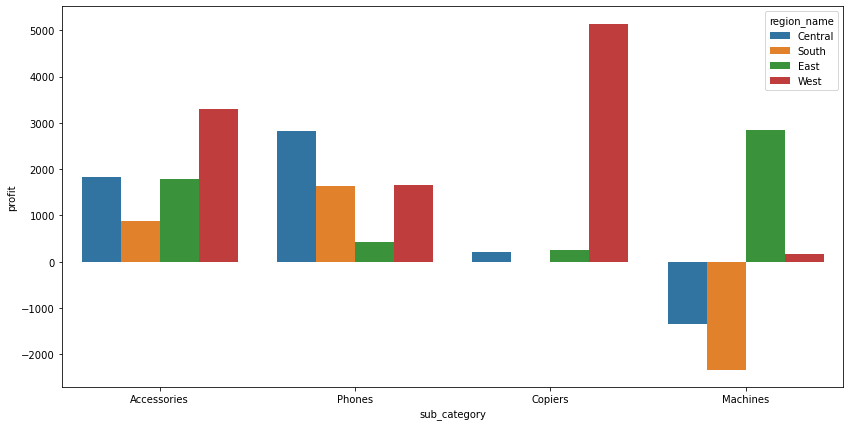

In [68]:
sns.barplot(data= technology_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum) 

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

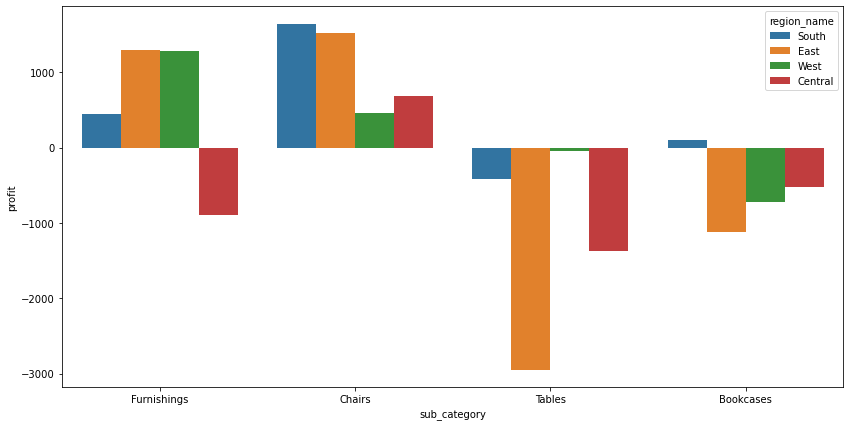

In [69]:
sns.barplot(data= furniture_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum) 

Text(0.5, 1.0, 'Furniture Products')

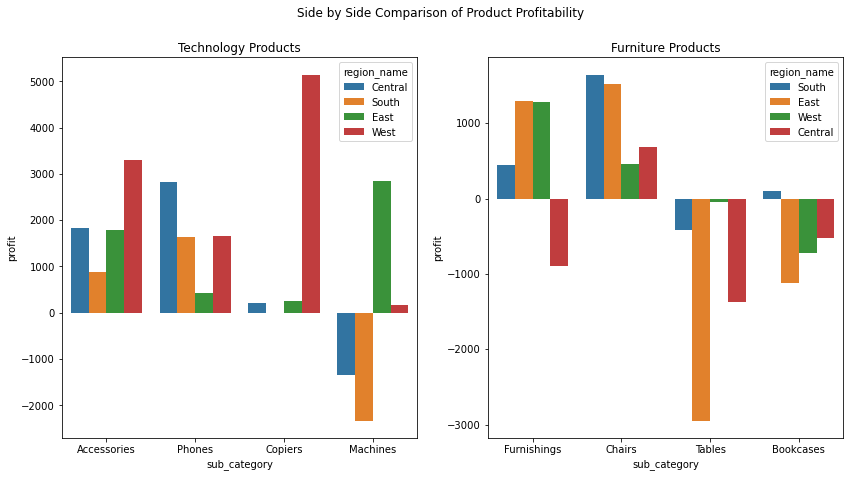

In [78]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Side by Side Comparison of Product Profitability')
sns.barplot(data= technology_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[0]).set_title('Technology Products')

sns.barplot(data= furniture_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[1]).set_title('Furniture Products')

In [ ]:
sns.barplot()

In [ ]:
df

In [80]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-xhuwkfmapq")

MitoWidget(analysis_data_json='{"analysisName": "id-xhuwkfmapq", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
technology_df = df.loc[df['category'] == 'Technology']

In [ ]:
Accessories, Copiers, Machines, Phones  

In [83]:
accessories = technology_df.loc[technology_df['sub_category'] == 'Accessories']
copiers = technology_df.loc[technology_df['sub_category'] == 'Copiers']
machines = technology_df.loc[technology_df['sub_category'] == 'Machines']
phones = technology_df.loc[technology_df['sub_category'] == 'Phones']

In [95]:
top3_accessories = accessories.sort_values(by='profit_per_product', ascending=False).head(3)
top3_copiers = copiers.sort_values(by='profit_per_product', ascending=False).head(3)
top3_machines = machines.sort_values(by='profit_per_product', ascending=False).head(3)
top3_phones = phones.sort_values(by='profit_per_product', ascending=False).head(3)


In [102]:
top3_df = pd.concat([top3_accessories, top3_copiers], axis=0)
top3_df = pd.concat([top3_df, top3_machines], axis=0)
top3_df = pd.concat([top3_df, top3_phones], axis=0)

In [116]:
canon_df = technology_df.loc[technology_df['product_name'].str.startswith('Canon', na=False)]
ativa_df = technology_df.loc[technology_df['product_name'].str.startswith('Ativa', na=False)]
lexmark_df = technology_df.loc[technology_df['product_name'].str.startswith('Lexmark', na=False)]
logitech_df = technology_df.loc[technology_df['product_name'].str.startswith('Logitech', na=False)]
maxell_df = technology_df.loc[technology_df['product_name'].str.startswith('Maxell', na=False)]
plantronics_df = technology_df.loc[technology_df['product_name'].str.startswith('Plantronics', na=False)]
polycom_df = technology_df.loc[technology_df['product_name'].str.startswith('Polycom', na=False)]
konftel_df = technology_df.loc[technology_df['product_name'].str.startswith('Konftel', na=False)]
mitel_df = technology_df.loc[technology_df['product_name'].str.startswith('Mitel', na=False)]

In [117]:
top_dawgs = pd.concat([canon_df, ativa_df], axis=0)
top_dawgs = pd.concat([top_dawgs, lexmark_df], axis=0)
top_dawgs = pd.concat([top_dawgs, logitech_df], axis=0)
top_dawgs = pd.concat([top_dawgs, maxell_df], axis=0)
top_dawgs = pd.concat([top_dawgs, plantronics_df], axis=0)
top_dawgs = pd.concat([top_dawgs, polycom_df], axis=0)
top_dawgs = pd.concat([top_dawgs, konftel_df], axis=0)
top_dawgs = pd.concat([top_dawgs, mitel_df], axis=0)

In [119]:
top_dawgs

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-07-06 00:00:00,TEC-CO-10001046,EP-13915,CA-2014-134278,2014-07-08,First Class,Consumer,New York City,New York,10011.0,559.992,...,Emily Phan,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,July,2014,174.9975,559.992
2014-09-21 01:00:00,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,Washington,98198.0,1799.970,...,Jack Garza,Canon PC1080F Personal Copier,Technology,Copiers,West,2 days,September,2014,233.9961,599.990
2014-11-04 01:00:00,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,New York,10024.0,3991.980,...,Nathan Mautz,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,Machines,East,5 days,November,2014,997.9950,1995.990
2015-03-19 02:00:00,TEC-CO-10001766,FH-14365,CA-2015-111829,2015-03-20,First Class,Corporate,Seattle,Washington,98115.0,3149.930,...,Fred Hopkins,Canon PC940 Copier,Technology,Copiers,West,1 days,March,2015,211.4953,449.990
2016-05-30 06:00:00,TEC-CO-10001046,BG-11695,CA-2016-153682,2016-06-01,First Class,Corporate,Cincinnati,Ohio,45231.0,839.988,...,Brooke Gillingham,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,May,2016,34.9995,419.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-09 06:00:00,TEC-PH-10002033,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,911.424,...,Brosina Hoffman,Konftel 250 Conference phone - Charcoal black,Technology,Phones,West,5 days,June,2014,17.0892,227.856
2014-06-21 01:00:00,TEC-PH-10002033,NP-18325,US-2014-117135,2014-06-23,Second Class,Consumer,Waynesboro,Virginia,22980.0,284.820,...,Naresj Patel,Konftel 250 Conference phone - Charcoal black,Technology,Phones,South,2 days,June,2014,74.0532,284.820
2014-06-09 02:00:00,TEC-PH-10002275,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,907.152,...,Brosina Hoffman,Mitel 5320 IP Phone VoIP phone,Technology,Phones,West,5 days,June,2014,15.1192,151.192


In [107]:
print(accessories.shape)
print(copiers.shape)
machines.shape, phones.shape

(131, 23)
(10, 23)


((21, 23), (157, 23))

In [104]:
import mitosheet
mitosheet.sheet(top3_df, analysis_to_replay="id-csrwikzscg")

MitoWidget(analysis_data_json='{"analysisName": "id-csrwikzscg", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; # Analysis Name:id-csrwikzscg;
    
# Sorted profit_per_product in top3_df in descending order
top3_df = top3_df.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [93]:
import mitosheet
mitosheet.sheet(copiers, analysis_to_replay="id-fcadjzhndx")

MitoWidget(analysis_data_json='{"analysisName": "id-fcadjzhndx", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; # Analysis Name:id-fcadjzhndx;
    
# Sorted profit_per_product in copiers in descending order
copiers = copiers.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [ ]:
from mitosheet import *; # Analysis Name:id-fpkcldsous;
    
# Sorted profit_per_product in accessories in descending order
accessories = accessories.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [ ]:
from mitosheet import *; # Analysis Name:id-nekmvczjte;
    
# Sorted profit_per_product in accessories in descending order
accessories = accessories.sort_values(by='profit_per_product', ascending=False, na_position='last')
